In [1]:
import os
import re
import numpy as np
# Directory containing the text files
data_dir = 'Z:\\Lab Data\\D52_Calibration_Ba137\\Fast_Ramsey_calibrations_180Hz_PhaseSweep'  # Change this to the directory where your files are stored
# data_dir = 'Z:\\Lab Data\\D52_Calibration_Ba137\\Fast_Ramsey_calibrations_180Hz_PhaseSweep\\properly_self_referenced_sweeps'
# Lists to store extracted data
lt_wait_values = []
second_line_values = []
ref_values = []
# Regular expression to match the file naming pattern
file_pattern = re.compile(r"ramsey_reference_transitions_LTWait(\d+\.\d+)us_Shots250_RamseyWait100us_20250120_.*")
# file_pattern = re.compile(r"ramsey_reference_transitions_LTWait(\d+\.\d+)us_Shots250_RamseyWait50us_202505(14|13)_.*")
# Loop through all files in the directory
for filename in os.listdir(data_dir):
    match = file_pattern.match(filename)
    if match:
        file_path = os.path.join(data_dir, filename)
        try:
            with open(file_path, 'r') as file:
                lines = file.readlines()

                # Extract the first line (LTWait value)
                lt_wait = float(lines[0].strip())
                lt_wait_values.append(lt_wait)

                # Extract the second line (two numbers)
                second_line = eval(lines[1].strip())  # Convert string to a Python list
                second_line_values.append(second_line)

                # refs_line = eval(lines[3].strip())
                # ref_values.append(refs_line)
                
        except Exception as e:
            print(f"Error reading file {filename}: {e}")

# Print or save the extracted data
print("LTWait values:", lt_wait_values)
print("Second line values:", second_line_values)
# print(ref_values)
# You can save these lists to a file if needed, e.g., using pickle or JSON


LTWait values: [0.0, 427.35042735042737, 854.7008547008547, 1282.051282051282, 1709.4017094017095, 2136.752136752137, 2564.102564102564, 2991.4529914529912, 3418.803418803419, 3846.153846153846, 4273.504273504274, 4700.8547008547, 5128.205128205128, 5555.555555555556, 5982.9059829059825, 6410.25641025641, 6837.606837606838, 7264.957264957266, 7692.307692307692, 8119.65811965812, 8547.008547008549, 8974.358974358975, 9401.7094017094, 9829.059829059828, 10256.410256410256, 10683.760683760684, 11111.111111111111, 11538.461538461539, 11965.811965811965, 12393.162393162393, 12820.51282051282, 13247.863247863248, 13675.213675213676, 14102.564102564103, 14529.914529914531, 14957.264957264957, 15384.615384615385, 15811.96581196581, 16239.31623931624, 16666.666666666668, 0.0, 427.35042735042737, 854.7008547008547]
Second line values: [[545.6956032276297, 623.5105549171228], [545.6954825402175, 623.5111158043783], [545.6955732324336, 623.5120333368527], [545.695618900731, 623.5126907108177], [54

In [2]:
times = lt_wait_values
freqs = second_line_values
freq_diffs = np.diff(freqs)

ref_freq_diff = np.diff(ref_values)

mag_values = (freq_diffs[0] - freq_diffs)/(-3.498)
# ref_mag_values = (ref_freq_diff[0] - ref_freq_diff)/(-3.498)


C:\Users\iamga\AppData\Local\Temp\ipykernel_25528\2499098916.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  params_opt, params_cov = curve_fit(signal_model, t_em, y_noisy_em,sigma = sigma_em, p0=initial_guess)


[ 0.00000000e+00  1.94846960e-04  4.31222106e-04  6.06095081e-04
  8.18261786e-04  9.53841685e-04  9.61933946e-04  8.24594946e-04
  6.37941738e-04  2.68677311e-04  8.46590910e-08 -2.70752326e-04
 -3.51313994e-04 -4.43336542e-04 -3.64637346e-04 -3.11438503e-04
  7.44693793e-05  2.76066710e-04  3.63293222e-04  3.81544325e-04
  3.29951646e-04  8.36580180e-05 -2.80628534e-04 -5.29913634e-04
 -7.14875386e-04 -6.71442816e-04 -4.85442132e-04 -3.18369003e-04
 -8.16334504e-05  9.27552494e-05  4.35991539e-04  6.42490326e-04
  6.51089200e-04  7.04898281e-04  6.64249136e-04  5.19662922e-04
  1.83408535e-04 -7.54296381e-05 -2.32032409e-04 -2.83295531e-04
  8.17606795e-05  1.70234983e-04  4.31281778e-04]

EM Coils Fit Parameter Uncertainties:
A_60 ± ΔA_60: 0.000361 ± inf
phi_60 ± Δphi_60: 1.301844 ± inf
A_180 ± ΔA_180: 0.000541 ± inf
phi_180 ± Δphi_180: -1.204196 ± inf
Offset ± ΔOffset: 0.000000 ± inf


  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\iamga\AppData\Local\Temp\ipykernel_25528\2499098916.py:48: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(signal_model, t_em, noisy_y, p0=initial_guess)
100%|██████████| 1000/1000 [00:00<00:00, 2395.86it/s]


EM Fit Parameters from Monte Carlo:
A_60 = 0.000361 ± 0.000008
phi_60 = 1.301541 ± 0.027804
A_180 = 0.000541 ± 0.000008
phi_180 = -1.204130 ± 0.017229
offset = -0.000000 ± 0.000003


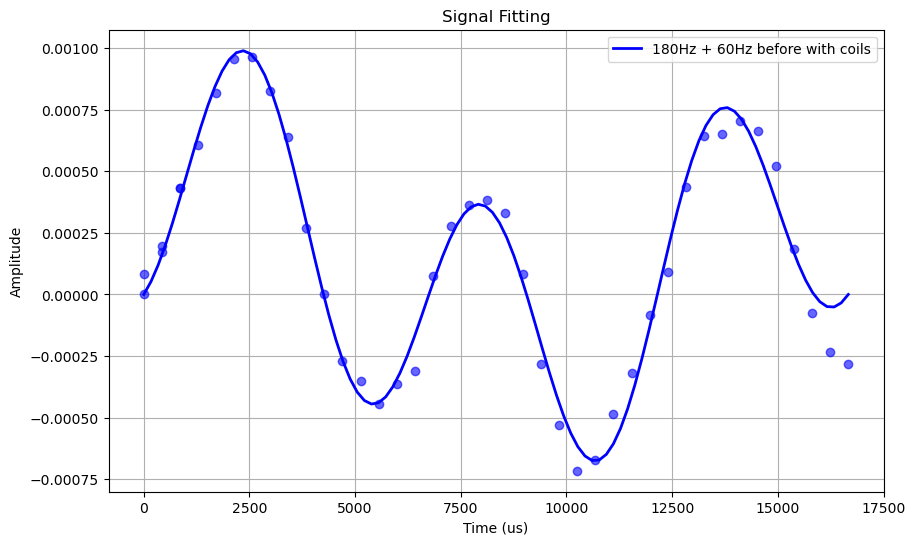

Optimized Parameters:
A1: 0.00036118826762693724, phi1: 1.3018441489667183
A2: 0.0005408873728129126, phi2: -1.2041955927825148
o 0.0


In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the fitting function
def signal_model(t, A1 = 0.0003423806060810839, phi1 = 1.2893867862091697, A2 = 0.0005574657128318643, phi2 = -1.2192683736729186,offset = 0.00014702831939132153):
    f1 = 60e-6  # Fixed frequency in Hz
    f2 = 180e-6  # Fixed frequency in Hz
    return (A1 * np.sin(2 * np.pi * f1 * t + phi1) + A2 * np.sin(2 * np.pi * f2 * t + phi2) + offset) - (A1 * np.sin(2 * np.pi * f1 * 0 + phi1) + A2 * np.sin(2 * np.pi * f2 * 0 + phi2) + offset)

t_em = np.array(times)*1
y_noisy_em = (mag_values - mag_values[0]).flatten()
print(y_noisy_em)
# Fit the noisy data
initial_guess = [5.070665560367654e-05, 0.9207133937059042, 1.3093099753692363e-05, 0.10484171795673591, 0.0003294808988507079]  # Initial guesses for [A1, phi1, A2, phi2]
initial_guess = [0.0001, 0,0.0001,0,0]
sigma_em = np.full_like(y_noisy_em, 0.045 / 1000)  # in Gauss

params_opt, params_cov = curve_fit(signal_model, t_em, y_noisy_em,sigma = sigma_em, p0=initial_guess)

# Extract optimized parameters
A1_fit, phi1_fit, A2_fit, phi2_fit, o = params_opt

# Generate the fitted signal
t_fit_em = np.linspace(min(t_em),max(t_em),100)
y_fit_em = signal_model(t_fit_em, A1_fit, phi1_fit, A2_fit, phi2_fit, o)
# y_fit_em = signal_model(t_fit_em,)
# Plot the results

param_unc_em = np.sqrt(np.diag(params_cov))
print("\nEM Coils Fit Parameter Uncertainties:")
print(f"A_60 ± ΔA_60: {A1_fit:.6f} ± {param_unc_em[0]:.6f}")
print(f"phi_60 ± Δphi_60: {phi1_fit:.6f} ± {param_unc_em[1]:.6f}")
print(f"A_180 ± ΔA_180: {A2_fit:.6f} ± {param_unc_em[2]:.6f}")
print(f"phi_180 ± Δphi_180: {phi2_fit:.6f} ± {param_unc_em[3]:.6f}")
print(f"Offset ± ΔOffset: {o:.6f} ± {param_unc_em[4]:.6f}")

from tqdm import tqdm

n_samples = 1000  # Number of resamples
fitted_params = []

for _ in tqdm(range(n_samples)):
    # Add random noise to y_noisy_em (in mG)
    noisy_y = y_noisy_em + np.random.normal(0, 0.045/1000, size=len(y_noisy_em))
    
    try:
        params, _ = curve_fit(signal_model, t_em, noisy_y, p0=initial_guess)
        fitted_params.append(params)
    except RuntimeError:
        continue  # Skip failed fits

fitted_params = np.array(fitted_params)
param_means = np.mean(fitted_params, axis=0)
param_stds = np.std(fitted_params, axis=0)

print("\nEM Fit Parameters from Monte Carlo:")
param_labels = ["A_60", "phi_60", "A_180", "phi_180", "offset"]
for label, mean, std in zip(param_labels, param_means, param_stds):
    print(f"{label} = {mean:.6f} ± {std:.6f}")


plt.figure(figsize=(10, 6))
plt.plot(t_em, y_noisy_em,'bo', alpha=0.6)
plt.plot(t_fit_em, y_fit_em,'b-',label="180Hz + 60Hz before with coils", linewidth=2)
plt.legend()
plt.xlabel("Time (us)")
plt.ylabel("Amplitude")
plt.title("Signal Fitting")
plt.grid()
plt.show()

# Print the optimized parameters
print("Optimized Parameters:")
print(f"A1: {A1_fit}, phi1: {phi1_fit}")
print(f"A2: {A2_fit}, phi2: {phi2_fit}")
print('o',o)

LTWait values: [0.0, 793.6507936507936, 0.0, 793.6507936507936, 1587.3015873015872, 2380.952380952381, 3174.6031746031745, 3968.253968253968, 4761.904761904762, 5555.555555555556, 6349.206349206349, 7142.857142857142, 7936.507936507936, 8730.15873015873, 9523.809523809525, 10317.460317460318, 11111.111111111111, 11904.761904761905, 12698.412698412698, 13492.063492063493, 14285.714285714284, 15079.36507936508, 15873.015873015873, 16666.666666666668]
Second line values: [[545.685652669677, 623.5590967426484], [545.6854883524836, 623.5594506402265], [545.6855071441664, 623.5587424362013], [545.6854239043208, 623.5592691874471], [545.6854483261296, 623.5595013279723], [545.6852781009457, 623.5596979733443], [545.6854753588653, 623.5598746424633], [545.6854721896229, 623.5598893946444], [545.6854552032446, 623.5599138898435], [545.685452681703, 623.5594613094963], [545.6854414606728, 623.5592592314996], [545.6854029945941, 623.5597779779181], [545.6854683134837, 623.5601829299846], [545.685

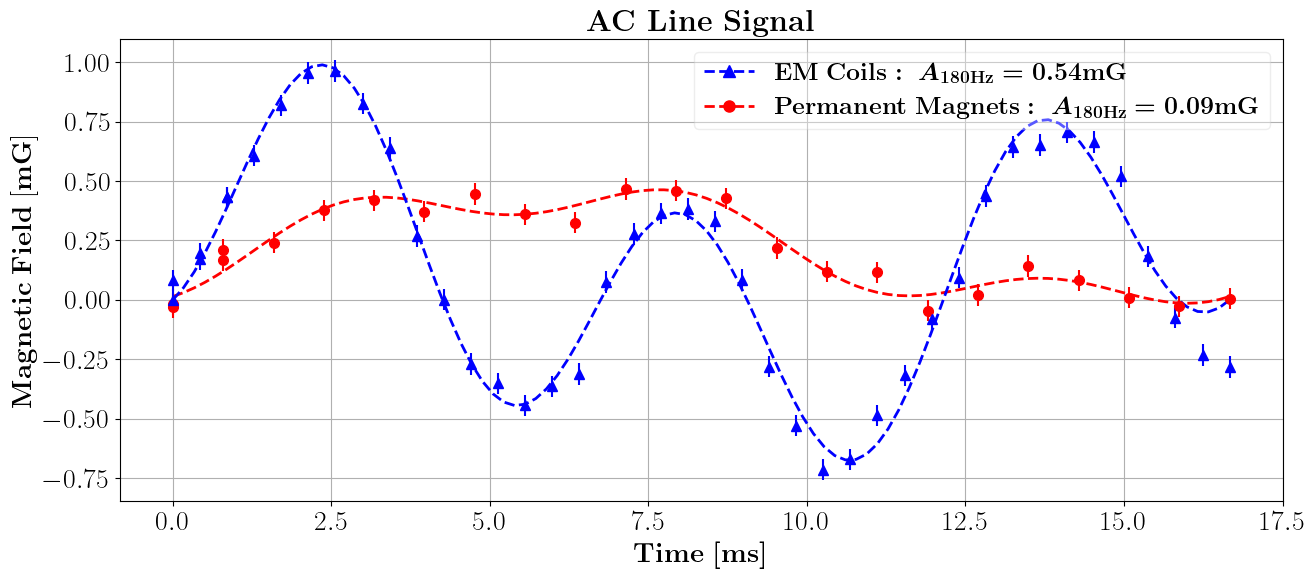

Optimized Parameters:
A_60: 0.00036118826762693724, phi1: 1.3018441489667183
A_180: 0.0005408873728129126, phi2: -1.2041955927825148
0.0
Optimized Parameters:
A_60: 0.00022513989874211622, phi1: -0.5675345934101713
A_180: 9.03586117362623e-05, phi2: -1.419844565194031
0.0


In [10]:
import os
import re
import numpy as np
from matplotlib import rcParams
import matplotlib.lines as mlines
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

# Increase font sizes
rcParams['axes.titlesize'] = 22      # Title of the plot
rcParams['axes.labelsize'] = 20      # Axis labels
rcParams['xtick.labelsize'] = 20     # X tick labels
rcParams['ytick.labelsize'] = 20     # Y tick labels
rcParams['legend.fontsize'] = 18     # Legend text
rcParams['figure.titlesize'] = 22    # Figure-wide title (if used)

# Directory containing the text files
data_dir = 'Z:\\Lab Data\\D52_Calibration_Ba137\\Fast_Ramsey_calibrations_180Hz_PhaseSweep\\properly_self_referenced_sweeps'  # Change this to the directory where your files are stored
# Z:\Lab Data\D52_Calibration_Ba137\RFSoC_LineSignal_sweep_SelfRef''
# Lists to store extracted data
lt_wait_values = []
second_line_values = []
fourth_line_values = []
# Regular expression to match the file naming pattern
file_pattern = re.compile(r"ramsey_reference_transitions_LTWait(\d+\.\d+)us_Shots250_RamseyWait50us_20250312_.*")
# file_pattern = re.compile(r"ramsey_reference_transitions_LTWait(\d+\.\d+)us_Shots250_RamseyWait50us_202505(14|13)_.*")

# Loop through all files in the directory
for filename in os.listdir(data_dir):
    match = file_pattern.match(filename)
    if match:
        file_path = os.path.join(data_dir, filename)
        try:
            with open(file_path, 'r') as file:
                lines = file.readlines()
                # print(lines)
                # Extract the first line (LTWait value)
                lt_wait = float(lines[0].strip())
                lt_wait_values.append(lt_wait)

                # Extract the second line (two numbers)
                second_line = eval(lines[1].strip())  # Convert string to a Python list
                second_line_values.append(second_line)
                fourth_line = eval(lines[3].strip())
                fourth_line_values.append(fourth_line)
        except Exception as e:
            print(f"Error reading file {filename}: {e}")

# Print or save the extracted data
print("LTWait values:", lt_wait_values)
print("Second line values:", second_line_values)
print("fourth line values:", fourth_line_values)
# You can save these lists to a file if needed, e.g., using pickle or JSON


times = lt_wait_values
freqs = second_line_values
freqs_ref = fourth_line_values
freq_diffs = np.diff(freqs)
freq_ref_diff = np.diff(freqs_ref)

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the fitting function
def signal_model(t, A1 = 0.0003423806060810839, phi1 = 1.2893867862091697, A2 = 0.0005574657128318643, phi2 = -1.2192683736729186,offset = 0.00014702831939132153):
    f1 = 60  # Fixed frequency in Hz
    f2 = 180  # Fixed frequency in Hz
    return A1 * np.sin(2 * np.pi * f1 * t + phi1) + A2 * np.sin(2 * np.pi * f2 * t + phi2) + offset

t_pm = np.array(times)
y_noisy_pm = np.array((freq_ref_diff - freq_diffs)/(-3.498)).flatten()
# print(t,y)
# Fit the noisy data
initial_guess = [0.0001, 0.0, 0.0001, 0.0, 0]  # Initial guesses for [A1, phi1, A2, phi2]
# params_opt, params_cov = curve_fit(signal_model, t_pm, y_noisy_pm, p0=initial_guess)

sigma_pm = np.full_like(y_noisy_pm, 0.045 / 1000)  # in Gauss

params_opt, params_cov = curve_fit(
    signal_model,
    t_pm,
    y_noisy_pm,
    p0=initial_guess,
    sigma=sigma_pm,
    absolute_sigma=True  # Ensures the sigma is treated as absolute, not relative weights
)

# Extract optimized parameters
A1_fit_pm, phi1_fit_pm, A2_fit_pm, phi2_fit_pm, o_pm = params_opt

t_fit_pm = np.linspace(min(t_pm),max(t_pm),100)
y_fit_pm = signal_model(t_fit_pm, A1_fit_pm, phi1_fit_pm, A2_fit_pm, phi2_fit_pm, o_pm)

param_unc_pm = np.sqrt(np.diag(params_cov))
print("\nPermanent Magnets Fit Parameter Uncertainties:")
print(f"A_60 ± ΔA_60: {A1_fit_pm:.6f} ± {param_unc_pm[0]:.6f}")
print(f"phi_60 ± Δphi_60: {phi1_fit_pm:.6f} ± {param_unc_pm[1]:.6f}")
print(f"A_180 ± ΔA_180: {A2_fit_pm:.6f} ± {param_unc_pm[2]:.6f}")
print(f"phi_180 ± Δphi_180: {phi2_fit_pm:.6f} ± {param_unc_pm[3]:.6f}")
print(f"Offset ± ΔOffset: {o_pm:.6f} ± {param_unc_pm[4]:.6f}")



def line_signal(t, 
                A1=0.00037318157768892316, phi1=-0.8406971425701916,
                A2=-0.0004562778378973005, phi2=-4.804949550471232,
                offset=0.0006463292835800108):
    return (
        A1 * np.sin(2 * np.pi * 60 * t + phi1) +
        A2 * np.sin(2 * np.pi * 180 * t + phi2) +
        offset
    ) - (
        A1 * np.sin(2 * np.pi * 60 * 0 + phi1) +
        A2 * np.sin(2 * np.pi * 180 * 0 + phi2) +
        offset
    )


# Plot the results

# plt.errorbar(t_pm/1000, y_noisy_pm*1000, yerr=0.045, fmt='ro', markersize=7, alpha=1)
# plt.errorbar(t_em/1000, y_noisy_em*1000, yerr=0.045, fmt='b^', markersize=7, alpha=1)


plt.figure(figsize=(15, 6))
plt.errorbar(t_pm/1000, y_noisy_pm*1000, yerr=0.045, fmt='ro', markersize=7, alpha=1)
plt.plot(t_fit_pm/1000, y_fit_pm*1000,'r--', label=r"\boldmath$\mathbf{AC\ Line\ signal\ with\ Permanent\ Magnets} -\ A_{180\mathbf{Hz}} = 0.09 \mathbf{mG}$", linewidth=2)
plt.errorbar(t_em/1000, y_noisy_em*1000, yerr=0.045, fmt='b^', markersize=7, alpha=1)
plt.plot(t_fit_em/1000, y_fit_em*1000,'b--',label=r"\boldmath$\mathbf{AC\ Line\ signal\ with\ EM\ Coils} -\ A_{180\mathbf{Hz}} = 0.54 \mathbf{mG}$", linewidth=2)
# plt.plot(t_fit, line_signal(t_fit))
combo_handle_PM = mlines.Line2D([], [], color='red',
                             marker='o', linestyle='--',
                             markersize=8, linewidth=2,
                             label=r"\boldmath$\mathbf{Permanent\ Magnets}:\ A_{180\mathbf{Hz}} = 0.09 \mathbf{mG}$")

combo_handle_EM = mlines.Line2D([], [], color='blue',
                             marker='^', linestyle='--',
                             markersize=8, linewidth=2,
                             label=r"\boldmath$\mathbf{EM\ Coils}:\ A_{180\mathbf{Hz}} = 0.54 \mathbf{mG}$")

# legend_xy = (0.70, 0.15)        # 0–1 axes-fraction coords — tweak at will
leg = plt.legend(handles=[combo_handle_EM, combo_handle_PM],
                # bbox_to_anchor=legend_xy,
                loc='upper right',
                framealpha=0.35,   # slightly transparent background
                fontsize=18)

for txt in leg.get_texts():
    txt.set_fontweight('bold')
# plt.legend()
plt.xlabel(r"\boldmath$\mathbf{Time\ [ms]}$")
plt.ylabel(r"$\mathbf{Magnetic\ Field\ [mG]}$")
plt.title(r"\textbf{AC Line Signal}")
plt.grid()
plt.savefig('line_signal_EM_vs_PM.svg')
plt.show()

# For PM data

# Print the optimized parameters
print("Optimized Parameters:")
print(f"A_60: {A1_fit}, phi1: {phi1_fit}")
print(f"A_180: {A2_fit}, phi2: {phi2_fit}")
print(o)

print("Optimized Parameters:")
print(f"A_60: {A1_fit_pm}, phi1: {phi1_fit_pm}")
print(f"A_180: {A2_fit_pm}, phi2: {phi2_fit_pm}")
print(o)

[-1.71171301e-05  1.65982334e-04 -3.02952009e-05  2.10099923e-04
  2.40105723e-04  3.76632955e-04  4.17900207e-04  3.71452071e-04
  4.45835847e-04  3.59986423e-04  3.24315250e-04  4.65629830e-04
  4.59736141e-04  4.27444456e-04  2.18655377e-04  1.18451746e-04
  1.15731163e-04 -4.51848613e-05  2.00988083e-05  1.42699031e-04
  8.17011668e-05  8.56089962e-06 -2.70001806e-05  4.30782162e-06]
[0.00178286 0.00173675 0.00197671 0.00196171 0.00186871 0.00188366
 0.00182157 0.00174175 0.00177169 0.00167996 0.00182931 0.00179467
 0.00183343 0.0018513  0.00171205 0.00207642 0.00180452 0.00214654
 0.0021161  0.00228527 0.00233827 0.00232972 0.00227629 0.0022844
 0.00182331 0.00226212 0.00220156 0.00236609 0.00240964 0.00226754
 0.00231054 0.00206291 0.00207873]

Permanent Magnets Fit Parameter Uncertainties:
A_60 ± ΔA_60: 0.000225 ± 0.000014
phi_60 ± Δphi_60: -0.567535 ± 0.056651
A_180 ± ΔA_180: 0.000090 ± 0.000013
phi_180 ± Δphi_180: -1.419845 ± 0.149854
Offset ± ΔOffset: 0.000224 ± 0.000009

New

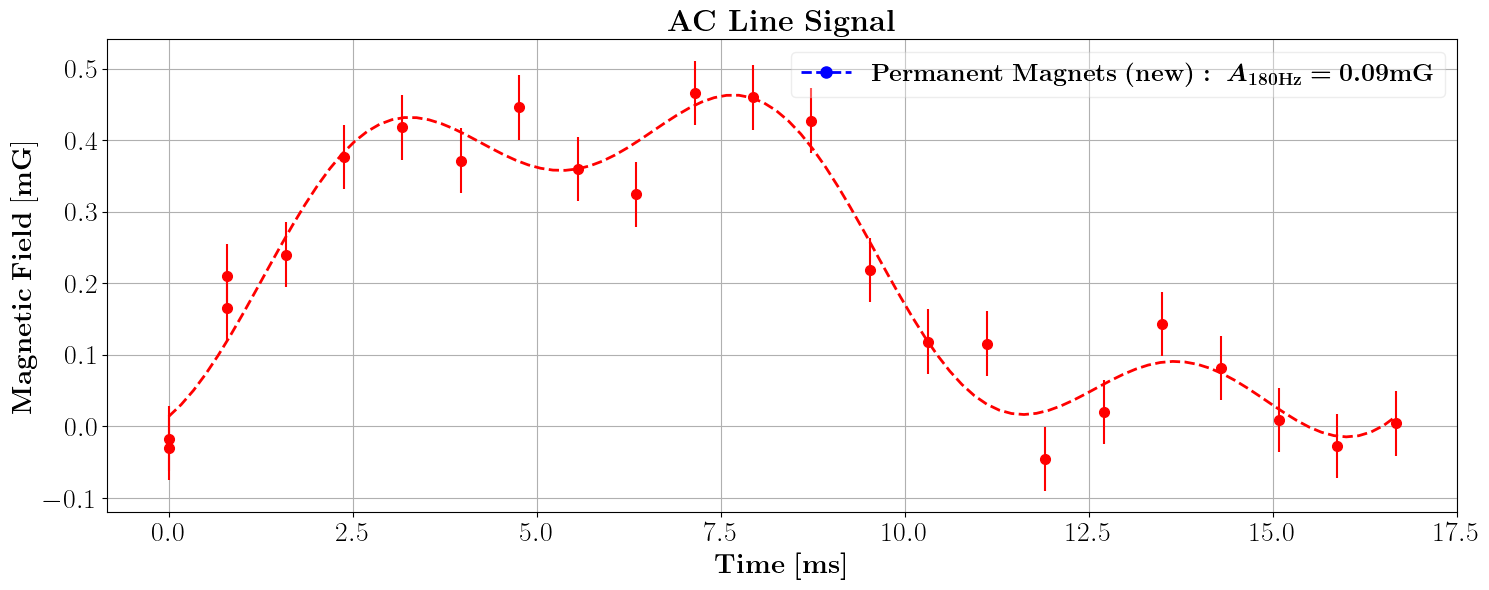

In [3]:
import os
import re
import numpy as np
from matplotlib import rcParams
import matplotlib.lines as mlines
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

# Increase font sizes
rcParams['axes.titlesize'] = 22      # Title of the plot
rcParams['axes.labelsize'] = 20      # Axis labels
rcParams['xtick.labelsize'] = 20     # X tick labels
rcParams['ytick.labelsize'] = 20     # Y tick labels
rcParams['legend.fontsize'] = 18     # Legend text
rcParams['figure.titlesize'] = 22    # Figure-wide title (if used)

# Directory containing the text files
data_dir = 'Z:\\Lab Data\\D52_Calibration_Ba137\\Fast_Ramsey_calibrations_180Hz_PhaseSweep\\properly_self_referenced_sweeps'  # Change this to the directory where your files are stored
data_dir_new = 'Z:\Lab Data\D52_Calibration_Ba137\RFSoC_LineSignal_sweep_SelfRef'  # Change this to the directory where your files are stored


# Regular expression to match the file naming pattern
file_pattern = re.compile(r"ramsey_reference_transitions_LTWait(\d+\.\d+)us_Shots250_RamseyWait50us_20250312_.*")
file_pattern_new = re.compile(r"ramsey_reference_transitions_LTWait(\d+\.\d+)us_Shots250_RamseyWait50us_20251121_.*")
# file_pattern = re.compile(r"ramsey_reference_transitions_LTWait(\d+\.\d+)us_Shots250_RamseyWait50us_202505(14|13)_.*")

def signal_model(t, A1 = 0.0003423806060810839, phi1 = 1.2893867862091697, A2 = 0.0005574657128318643, phi2 = -1.2192683736729186,offset = 0.00014702831939132153):
    f1 = 60  # Fixed frequency in Hz
    f2 = 180  # Fixed frequency in Hz
    return A1 * np.sin(2 * np.pi * f1 * t + phi1) + A2 * np.sin(2 * np.pi * f2 * t + phi2) + offset

def read_files_and_analyze(data_dir, file_pattern):
    lt_wait_values = []
    second_line_values = []
    fourth_line_values = []

    # Loop through all files in the directory
    for filename in os.listdir(data_dir):
        match = file_pattern.match(filename)
        if match:
            file_path = os.path.join(data_dir, filename)
            try:
                with open(file_path, 'r') as file:
                    lines = file.readlines()
                    # print(lines)
                    # Extract the first line (LTWait value)
                    lt_wait = float(lines[0].strip())
                    lt_wait_values.append(lt_wait)

                    # Extract the second line (two numbers)
                    second_line = eval(lines[1].strip())  # Convert string to a Python list
                    second_line_values.append(second_line)
                    fourth_line = eval(lines[3].strip())
                    fourth_line_values.append(fourth_line)
            except Exception as e:
                print(f"Error reading file {filename}: {e}")

    # Print or save the extracted data
    # print("LTWait values:", lt_wait_values)
    # print("Second line values:", second_line_values)
    # print("fourth line values:", fourth_line_values)
    # # You can save these lists to a file if needed, e.g., using pickle or JSON


    times = lt_wait_values
    freqs = second_line_values
    freqs_ref = fourth_line_values
    freq_diffs = np.diff(freqs)
    freq_ref_diff = np.diff(freqs_ref)

    # print('freq_diffs', freq_diffs)
    # print('freq_ref_diff', freq_ref_diff)

    t_pm = np.array(times)
    y_noisy_pm = np.array((freq_ref_diff - freq_diffs)/(-3.498)).flatten()
    print(y_noisy_pm)
    # print(t,y)
    # Fit the noisy data
    initial_guess = [0.0001, 0.0, 0.0001, 0.0, 0]  # Initial guesses for [A1, phi1, A2, phi2]
    # params_opt, params_cov = curve_fit(signal_model, t_pm, y_noisy_pm, p0=initial_guess)

    sigma_pm = np.full_like(y_noisy_pm, 0.045 / 1000)  # in Gauss

    params_opt, params_cov = curve_fit(
        signal_model,
        t_pm,
        y_noisy_pm,
        p0=initial_guess,
        sigma=sigma_pm,
        absolute_sigma=True  # Ensures the sigma is treated as absolute, not relative weights
    )

    A1_fit_pm, phi1_fit_pm, A2_fit_pm, phi2_fit_pm, o_pm = params_opt
    return A1_fit_pm, phi1_fit_pm, A2_fit_pm, phi2_fit_pm, o_pm, t_pm, y_noisy_pm, params_cov

A1_fit_pm, phi1_fit_pm, A2_fit_pm, phi2_fit_pm, o_pm, t_pm, y_noisy_pm, params_cov = read_files_and_analyze(data_dir, file_pattern)
A1_fit_pm_new, phi1_fit_pm_new, A2_fit_pm_new, phi2_fit_pm_new, o_pm_new, t_pm_new, y_noisy_pm_new, params_cov_new = read_files_and_analyze(data_dir_new, file_pattern_new) 

t_fit_pm = np.linspace(min(t_pm),max(t_pm),100)
t_fit_pm_new = np.linspace(min(t_pm_new),max(t_pm_new),100)

y_fit_pm = signal_model(t_fit_pm, A1_fit_pm, phi1_fit_pm, A2_fit_pm, phi2_fit_pm, o_pm)
y_fit_pm_new = signal_model(t_fit_pm_new, A1_fit_pm_new, phi1_fit_pm_new, A2_fit_pm_new, phi2_fit_pm_new, o_pm_new)

param_unc_pm = np.sqrt(np.diag(params_cov))
print("\nPermanent Magnets Fit Parameter Uncertainties:")
print(f"A_60 ± ΔA_60: {A1_fit_pm:.6f} ± {param_unc_pm[0]:.6f}")
print(f"phi_60 ± Δphi_60: {phi1_fit_pm:.6f} ± {param_unc_pm[1]:.6f}")
print(f"A_180 ± ΔA_180: {A2_fit_pm:.6f} ± {param_unc_pm[2]:.6f}")
print(f"phi_180 ± Δphi_180: {phi2_fit_pm:.6f} ± {param_unc_pm[3]:.6f}")
print(f"Offset ± ΔOffset: {o_pm:.6f} ± {param_unc_pm[4]:.6f}")

param_unc_pm_new = np.sqrt(np.diag(params_cov_new))
print("\nNew Permanent Magnets Fit Parameter Uncertainties:")
print(f"A_60 ± ΔA_60: {A1_fit_pm_new:.6f} ± {param_unc_pm_new[0]:.6f}")
print(f"phi_60 ± Δphi_60: {phi1_fit_pm_new:.6f} ± {param_unc_pm_new[1]:.6f}")
print(f"A_180 ± ΔA_180: {A2_fit_pm_new:.6f} ± {param_unc_pm_new[2]:.6f}")
print(f"phi_180 ± Δphi_180: {phi2_fit_pm_new:.6f} ± {param_unc_pm_new[3]:.6f}")
print(f"Offset ± ΔOffset: {o_pm_new:.6f} ± {param_unc_pm_new[4]:.6f}")

plt.figure(figsize=(15, 6))
plt.errorbar(t_pm/1000, y_noisy_pm*1000, yerr=0.045, fmt='ro', markersize=7, alpha=1)
plt.plot(t_fit_pm/1000, y_fit_pm*1000,'r--', label=r"\boldmath$\mathbf{AC\ Line\ signal\ with\ Permanent\ Magnets} -\ A_{180\mathbf{Hz}} = 0.09 \mathbf{mG}$", linewidth=2)
# plt.errorbar(t_pm_new/1000, y_noisy_pm_new*1000, yerr=0.045, fmt='bo', markersize=7, alpha=1)
# plt.plot(t_fit_pm_new/1000, y_fit_pm_new*1000,'b--', label=r"\boldmath$\mathbf{AC\ Line\ signal\ with\ Permanent\ Magnets_new} -\ A_{180\mathbf{Hz}} = 0.09 \mathbf{mG}$", linewidth=2)

def line_signal(t, 
                A1=0.00037318157768892316, phi1=-0.8406971425701916,
                A2=-0.0004562778378973005, phi2=-4.804949550471232,
                offset=0.00206463292835800108):
    return (
        A1 * np.sin(2 * np.pi * 60 * t + phi1) +
        A2 * np.sin(2 * np.pi * 180 * t + phi2) +
        offset
    ) - (
        A1 * np.sin(2 * np.pi * 60 * 0 + phi1) +
        A2 * np.sin(2 * np.pi * 180 * 0 + phi2) +
        offset
    )

# plt.plot(t_fit_pm_new/1000, line_signal(t_fit_pm_new/1000), 'g--', label=r"\boldmath$\mathbf{Line\ Signal\ Model}$", linewidth=2)

# combo_handle_PM = mlines.Line2D([], [], color='red',
#                              marker='o', linestyle='--',
#                              markersize=8, linewidth=2,
#                              label=r"\boldmath$\mathbf{Permanent\ Magnets}:\ A_{180\mathbf{Hz}} = 0.09 \mathbf{mG}$")
combo_handle_PM_new = mlines.Line2D([], [], color='blue',
                             marker='o', linestyle='--',
                             markersize=8, linewidth=2,
                             label=r"\boldmath$\mathbf{Permanent\ Magnets\ (new)}:\ A_{180\mathbf{Hz}} = 0.09 \mathbf{mG}$")


# legend_xy = (0.70, 0.15)        # 0–1 axes-fraction coords — tweak at will
leg = plt.legend(handles=[combo_handle_PM_new],
                # bbox_to_anchor=legend_xy,
                loc='upper right',
                framealpha=0.35,   # slightly transparent background
                fontsize=18)

for txt in leg.get_texts():
    txt.set_fontweight('bold')
# plt.legend()
plt.xlabel(r"\boldmath$\mathbf{Time\ [ms]}$")
plt.ylabel(r"$\mathbf{Magnetic\ Field\ [mG]}$")
plt.title(r"\textbf{AC Line Signal}")
plt.grid()
plt.tight_layout()
plt.savefig('line_signal_EM_vs_PM.svg')
plt.show()


In [9]:
%matplotlib widget


Permanent Magnets Fit Parameter Uncertainties:
A_60 ± ΔA_60: 0.000225 ± 0.000015
phi_60 ± Δphi_60: -0.567779 ± 0.062934
A_180 ± ΔA_180: 0.000090 ± 0.000014
phi_180 ± Δphi_180: -1.417171 ± 0.163626
Offset ± ΔOffset: 0.000241 ± 0.000010

New Permanent Magnets Fit Parameter Uncertainties:
A_60 ± ΔA_60: 0.000309 ± 0.000014
phi_60 ± Δphi_60: -0.613928 ± 0.045875
A_180 ± ΔA_180: 0.000067 ± 0.000014
phi_180 ± Δphi_180: 4.479853 ± 0.218467
Offset ± ΔOffset: 0.000253 ± 0.000010


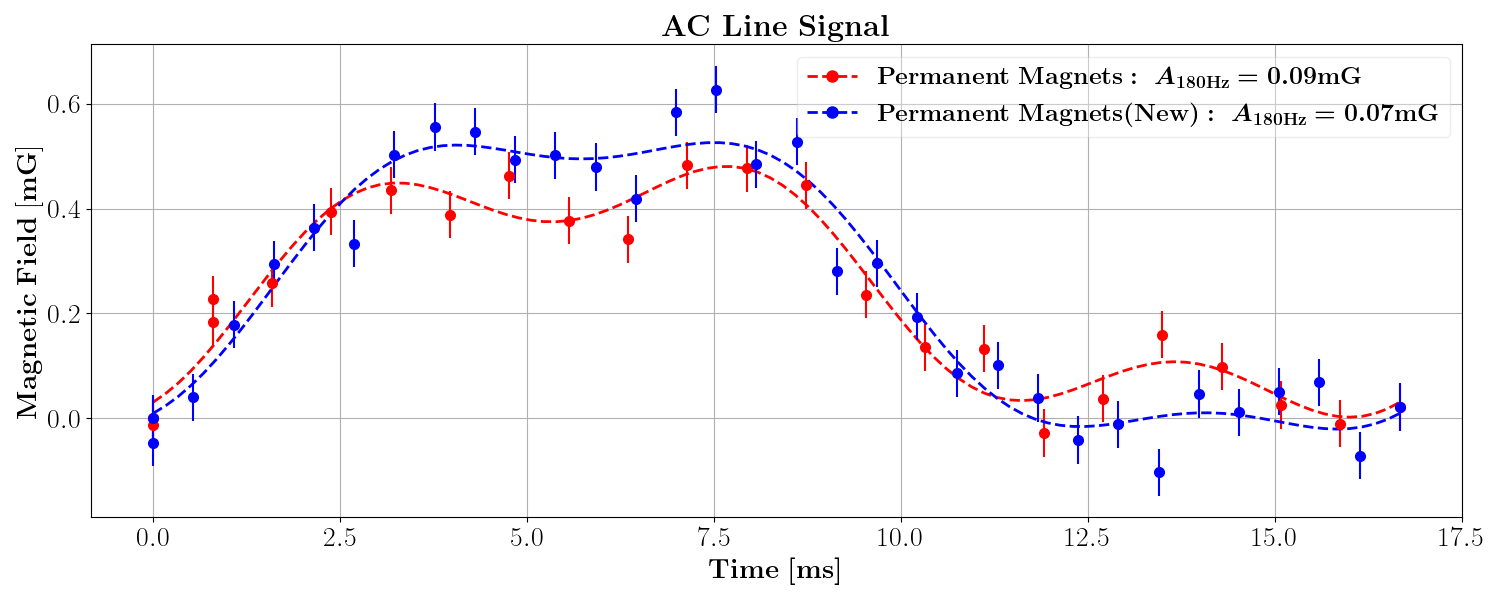

In [ ]:
import os
import re
import numpy as np
from matplotlib import rcParams
import matplotlib.lines as mlines
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

# Increase font sizes
rcParams['axes.titlesize'] = 22      # Title of the plot
rcParams['axes.labelsize'] = 20      # Axis labels
rcParams['xtick.labelsize'] = 20     # X tick labels
rcParams['ytick.labelsize'] = 20     # Y tick labels
rcParams['legend.fontsize'] = 18     # Legend text
rcParams['figure.titlesize'] = 22    # Figure-wide title (if used)

# Directory containing the text files
data_dir = 'Z:\\Lab Data\\D52_Calibration_Ba137\\Fast_Ramsey_calibrations_180Hz_PhaseSweep\\properly_self_referenced_sweeps'  # Change this to the directory where your files are stored
data_dir_new = 'Z:\Lab Data\D52_Calibration_Ba137\RFSoC_LineSignal_sweep_SelfRef'  # Change this to the directory where your files are stored


# Regular expression to match the file naming pattern
file_pattern = re.compile(r"ramsey_reference_transitions_LTWait(\d+\.\d+)us_Shots250_RamseyWait50us_20250312_.*")
file_pattern_new = re.compile(r"ramsey_reference_transitions_LTWait(\d+\.\d+)us_Shots250_RamseyWait50us_20251121_.*")
# file_pattern = re.compile(r"ramsey_reference_transitions_LTWait(\d+\.\d+)us_Shots250_RamseyWait50us_202505(14|13)_.*")

def signal_model(t, A1 = 0.0003423806060810839, phi1 = 1.2893867862091697, A2 = 0.0005574657128318643, phi2 = -1.2192683736729186,offset = 0.00014702831939132153):
    f1 = 60  # Fixed frequency in Hz
    f2 = 180  # Fixed frequency in Hz
    return A1 * np.sin(2 * np.pi * f1 * t + phi1) + A2 * np.sin(2 * np.pi * f2 * t + phi2) + offset

def read_files_and_analyze(data_dir, file_pattern):
    lt_wait_values = []
    second_line_values = []
    fourth_line_values = []

    # Loop through all files in the directory
    for filename in os.listdir(data_dir):
        match = file_pattern.match(filename)
        if match:
            file_path = os.path.join(data_dir, filename)
            try:
                with open(file_path, 'r') as file:
                    lines = file.readlines()
                    # print(lines)
                    # Extract the first line (LTWait value)
                    lt_wait = float(lines[0].strip())
                    lt_wait_values.append(lt_wait)

                    # Extract the second line (two numbers)
                    second_line = eval(lines[1].strip())  # Convert string to a Python list
                    second_line_values.append(second_line)
                    fourth_line = eval(lines[3].strip())
                    fourth_line_values.append(fourth_line)
            except Exception as e:
                print(f"Error reading file {filename}: {e}")

    # Print or save the extracted data
    # print("LTWait values:", lt_wait_values)
    # print("Second line values:", second_line_values)
    # print("fourth line values:", fourth_line_values)
    # # You can save these lists to a file if needed, e.g., using pickle or JSON


    times = lt_wait_values
    freqs = second_line_values
    freqs_ref = fourth_line_values
    freq_diffs = np.diff(freqs)
    freq_ref_diff = np.diff(freqs_ref)

    # print('freq_diffs', freq_diffs)
    # print('freq_ref_diff', freq_ref_diff)

    t_pm = np.array(times)
    # print(t_pm)
    y_noisy_pm = np.array(((freq_ref_diff - freq_diffs) - (freq_ref_diff - freq_diffs)[0])/(-3.498)).flatten()
    # print(y_noisy_pm)
    # print(t,y)
    # Fit the noisy data
    initial_guess = [0.0001, 0.0, 0.0001, 0.0, 0]  # Initial guesses for [A1, phi1, A2, phi2]
    # params_opt, params_cov = curve_fit(signal_model, t_pm, y_noisy_pm, p0=initial_guess)

    sigma_pm = np.full_like(y_noisy_pm, 0.045 / 1e3)  # in Gauss

    params_opt, params_cov = curve_fit(
        signal_model,
        t_pm*1e-6,
        y_noisy_pm,
        p0=initial_guess
        # sigma=sigma_pm,
        # absolute_sigma=True  # Ensures the sigma is treated as absolute, not relative weights
    )

    A1_fit_pm, phi1_fit_pm, A2_fit_pm, phi2_fit_pm, o_pm = params_opt
    return A1_fit_pm, phi1_fit_pm, A2_fit_pm, phi2_fit_pm, o_pm, t_pm, y_noisy_pm, params_cov

A1_fit_pm, phi1_fit_pm, A2_fit_pm, phi2_fit_pm, o_pm, t_pm, y_noisy_pm, params_cov = read_files_and_analyze(data_dir, file_pattern)
A1_fit_pm_new, phi1_fit_pm_new, A2_fit_pm_new, phi2_fit_pm_new, o_pm_new, t_pm_new, y_noisy_pm_new, params_cov_new = read_files_and_analyze(data_dir_new, file_pattern_new) 

t_fit_pm = np.linspace(min(t_pm),max(t_pm),100)
t_fit_pm_new = np.linspace(min(t_pm_new),max(t_pm_new),100)

y_fit_pm = signal_model(t_fit_pm, A1_fit_pm, phi1_fit_pm, A2_fit_pm, phi2_fit_pm, o_pm)
y_fit_pm_new = signal_model(t_fit_pm_new, A1_fit_pm_new, phi1_fit_pm_new, A2_fit_pm_new, phi2_fit_pm_new, o_pm_new)

param_unc_pm = np.sqrt(np.diag(params_cov))
print("\nPermanent Magnets Fit Parameter Uncertainties:")
print(f"A_60 ± ΔA_60: {A1_fit_pm:.6f} ± {param_unc_pm[0]:.6f}")
print(f"phi_60 ± Δphi_60: {phi1_fit_pm:.6f} ± {param_unc_pm[1]:.6f}")
print(f"A_180 ± ΔA_180: {A2_fit_pm:.6f} ± {param_unc_pm[2]:.6f}")
print(f"phi_180 ± Δphi_180: {phi2_fit_pm:.6f} ± {param_unc_pm[3]:.6f}")
print(f"Offset ± ΔOffset: {o_pm:.6f} ± {param_unc_pm[4]:.6f}")

param_unc_pm_new = np.sqrt(np.diag(params_cov_new))
print("\nNew Permanent Magnets Fit Parameter Uncertainties:")
print(f"A_60 ± ΔA_60: {A1_fit_pm_new:.6f} ± {param_unc_pm_new[0]:.6f}")
print(f"phi_60 ± Δphi_60: {phi1_fit_pm_new:.6f} ± {param_unc_pm_new[1]:.6f}")
print(f"A_180 ± ΔA_180: {A2_fit_pm_new:.6f} ± {param_unc_pm_new[2]:.6f}")
print(f"phi_180 ± Δphi_180: {phi2_fit_pm_new:.6f} ± {param_unc_pm_new[3]:.6f}")
print(f"Offset ± ΔOffset: {o_pm_new:.6f} ± {param_unc_pm_new[4]:.6f}")

plt.figure(figsize=(15, 6))
plt.errorbar(t_pm/1000, y_noisy_pm*1000, yerr=0.045, fmt='ro', markersize=7, alpha=1)
plt.plot(t_fit_pm/1000, y_fit_pm*1000,'r--', label=r"\boldmath$\mathbf{AC\ Line\ signal\ with\ Permanent\ Magnets} -\ A_{180\mathbf{Hz}} = 0.09 \mathbf{mG}$", linewidth=2)
plt.errorbar(t_pm_new/1000, y_noisy_pm_new*1000, yerr=0.045, fmt='bo', markersize=7, alpha=1)
plt.plot(t_fit_pm_new/1000, y_fit_pm_new*1000,'b--', label=r"\boldmath$\mathbf{AC\ Line\ signal\ with\ Permanent\ Magnets_new} -\ A_{180\mathbf{Hz}} = 0.09 \mathbf{mG}$", linewidth=2)

def line_signal(t, 
                A1=A1_fit_pm_new, phi1=phi1_fit_pm_new,
                A2=A2_fit_pm_new, phi2=phi2_fit_pm_new,
                offset=o_pm_new):
    return (
        A1 * np.sin(2 * np.pi * 60 * t + phi1) +
        A2 * np.sin(2 * np.pi * 180 * t + phi2) +
        offset
    ) - (
        A1 * np.sin(2 * np.pi * 60 * 0 + phi1) +
        A2 * np.sin(2 * np.pi * 180 * 0 + phi2) +
        offset
    )

combo_handle_PM = mlines.Line2D([], [], color='red',
                             marker='o', linestyle='--',
                             markersize=8, linewidth=2,
                             label=fr"\boldmath$\mathbf{{Permanent\ Magnets}}:\ A_{{180\mathbf{{Hz}}}} = {np.round(A2_fit_pm*1000, 2)} \mathbf{{mG}}$")
combo_handle_PM_new = mlines.Line2D([], [], color='blue',
                             marker='o', linestyle='--',
                             markersize=8, linewidth=2,
                             label=fr"\boldmath$\mathbf{{Permanent\ Magnets (New)}}:\ A_{{180\mathbf{{Hz}}}} = {np.round(A2_fit_pm_new*1000, 2)} \mathbf{{mG}}$")


# legend_xy = (0.70, 0.15)        # 0–1 axes-fraction coords — tweak at will
leg = plt.legend(handles=[combo_handle_PM,combo_handle_PM_new],
                # bbox_to_anchor=legend_xy,
                loc='upper right',
                framealpha=0.35,   # slightly transparent background
                fontsize=18)

for txt in leg.get_texts():
    txt.set_fontweight('bold')
# plt.legend()
plt.xlabel(r"\boldmath$\mathbf{Time\ [ms]}$")
plt.ylabel(r"$\mathbf{Magnetic\ Field\ [mG]}$")
plt.title(r"\textbf{AC Line Signal}")
plt.grid()
plt.tight_layout()
plt.savefig('line_signal_EM_vs_PM.png')
plt.show()


In [8]:
%matplotlib widget